In [2]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(-39.62252822443815, 23.51320544362119), (-49.242624864154195, 121.56859774570728), (46.81560711452457, 86.37920611408276), (-57.25009493637798, 108.16691004864481), (19.306394095473877, 123.01900166739733), (12.228878714573057, -130.4864054865072), (-13.94009482294257, -113.49473851926018), (5.027978820657893, -121.8405918250269), (-84.57270693102333, -55.76950330180328), (1.2500612415554855, -153.25956823929826), (-75.59639470716276, -77.09402163045434), (43.50029529996334, 160.85089335186535), (19.100133554028446, -162.7970338519146), (81.96564239674109, 87.31539146388434), (-47.31802505978177, 136.99954204287144), (28.683897499484473, -7.942663685644362), (-69.1026649513224, -13.612670405840959), (-86.05349499397245, -134.38699411372), (89.94493550557513, 103.40268035711978), (-7.752512162407115, 17.279704922689717), (-55.447318606943405, -95.39710826836274), (-79.62124674141869, -174.53394967806108), (-46.2140876623494, 103.27645511038816), (-7.033401818613228, -59.20143526745311

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | plettenberg bay
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | zaysan
Processing Record 4 of Set 1 | san vicente
Processing Record 5 of Set 1 | guerrero negro
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | portland
Processing Record 14 of Set 1 | tarudant
City not found. Skipping...
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | kasongo-lunda
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | jacareacanga
Processing Record 22 of Set 1 | p

Processing Record 39 of Set 4 | lichuan
Processing Record 40 of Set 4 | hamilton
Processing Record 41 of Set 4 | harper
Processing Record 42 of Set 4 | srednekolymsk
Processing Record 43 of Set 4 | minas
Processing Record 44 of Set 4 | taoudenni
Processing Record 45 of Set 4 | ha giang
Processing Record 46 of Set 4 | yantal
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | mergui
City not found. Skipping...
Processing Record 50 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | san quintin
Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | okha
Processing Record 5 of Set 5 | alice springs
Processing Record 6 of Set 5 | suez
Processing Record 7 of Set 5 | bulawayo
Processing Record 8 of Set 5 | noumea
Processing Record 9 of Set 5 | padang
Processing Record 10 of Set 5 | yumen
Processing R

Processing Record 30 of Set 8 | lata
Processing Record 31 of Set 8 | ballachulish
Processing Record 32 of Set 8 | boromo
Processing Record 33 of Set 8 | aklavik
Processing Record 34 of Set 8 | pawai
Processing Record 35 of Set 8 | sumbe
Processing Record 36 of Set 8 | tokur
Processing Record 37 of Set 8 | bonavista
Processing Record 38 of Set 8 | zambezi
Processing Record 39 of Set 8 | danshui
Processing Record 40 of Set 8 | saint anthony
Processing Record 41 of Set 8 | cap malheureux
Processing Record 42 of Set 8 | zhanaozen
Processing Record 43 of Set 8 | olinda
Processing Record 44 of Set 8 | jinchang
Processing Record 45 of Set 8 | hannan
Processing Record 46 of Set 8 | port elizabeth
Processing Record 47 of Set 8 | porangatu
Processing Record 48 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 49 of Set 8 | northam
Processing Record 50 of Set 8 | yerbogachen
Processing Record 1 of Set 9 | arrifes
Processing Record 2 of Set 9 | kaduqli
Processing Recor

Processing Record 16 of Set 12 | harbour breton
Processing Record 17 of Set 12 | rivera
Processing Record 18 of Set 12 | santiago
Processing Record 19 of Set 12 | kitangari
Processing Record 20 of Set 12 | zhirnov
Processing Record 21 of Set 12 | lorengau
Processing Record 22 of Set 12 | kegayli
City not found. Skipping...
Processing Record 23 of Set 12 | matongo
Processing Record 24 of Set 12 | arica
Processing Record 25 of Set 12 | chengde
Processing Record 26 of Set 12 | panjab
Processing Record 27 of Set 12 | maniwaki
Processing Record 28 of Set 12 | merauke
Processing Record 29 of Set 12 | tuy hoa
Processing Record 30 of Set 12 | grasse
Processing Record 31 of Set 12 | conceicao das alagoas
Processing Record 32 of Set 12 | lahat
Processing Record 33 of Set 12 | margate
Processing Record 34 of Set 12 | caxito
Processing Record 35 of Set 12 | tynda
Processing Record 36 of Set 12 | kenai
Processing Record 37 of Set 12 | nioro
Processing Record 38 of Set 12 | darovskoy
Processing Reco

In [8]:
len(city_data)

556

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Plettenberg Bay,-34.0527,23.3716,60.33,66,2,5.41,ZA,2022-09-21 19:12:43
1,Albany,42.6001,-73.9662,78.24,67,10,1.99,US,2022-09-21 19:11:36
2,Zaysan,47.4667,84.8667,60.62,24,0,4.00,KZ,2022-09-21 19:12:44
3,San Vicente,-26.6167,-54.1333,65.79,90,94,1.50,AR,2022-09-21 19:12:44
4,Guerrero Negro,27.9769,-114.0611,80.56,56,14,9.57,MX,2022-09-21 19:12:44
5,Rikitea,-23.1203,-134.9692,73.02,75,0,14.45,PF,2022-09-21 19:12:45
6,Cabo San Lucas,22.8909,-109.9124,88.52,74,20,6.91,MX,2022-09-21 19:11:20
7,Ushuaia,-54.8000,-68.3000,49.66,53,40,11.50,AR,2022-09-21 19:12:46
8,Faanui,-16.4833,-151.7500,78.26,75,7,21.56,PF,2022-09-21 19:12:46
9,Severo-Kurilsk,50.6789,156.1250,47.82,75,6,15.17,RU,2022-09-21 19:12:46


In [10]:
#reorder columns 
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Plettenberg Bay,ZA,2022-09-21 19:12:43,-34.0527,23.3716,60.33,66,2,5.41
1,Albany,US,2022-09-21 19:11:36,42.6001,-73.9662,78.24,67,10,1.99
2,Zaysan,KZ,2022-09-21 19:12:44,47.4667,84.8667,60.62,24,0,4.00
3,San Vicente,AR,2022-09-21 19:12:44,-26.6167,-54.1333,65.79,90,94,1.50
4,Guerrero Negro,MX,2022-09-21 19:12:44,27.9769,-114.0611,80.56,56,14,9.57
...,...,...,...,...,...,...,...,...,...
551,Curvelo,BR,2022-09-21 19:17:23,-18.7564,-44.4308,86.95,39,100,6.64
552,Vao,NC,2022-09-21 19:17:24,-22.6667,167.4833,71.85,75,100,11.30
553,Pontianak,ID,2022-09-21 19:17:25,-0.0333,109.3333,73.80,92,100,2.44
554,Tikhvin,RU,2022-09-21 19:17:25,59.6451,33.5294,45.21,95,45,4.23


In [13]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


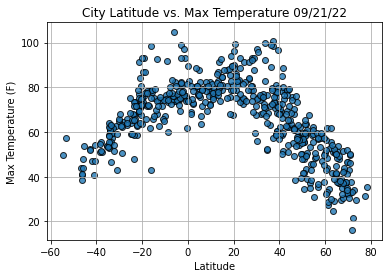

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

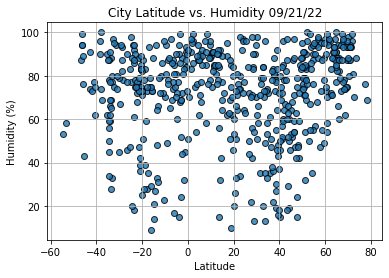

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

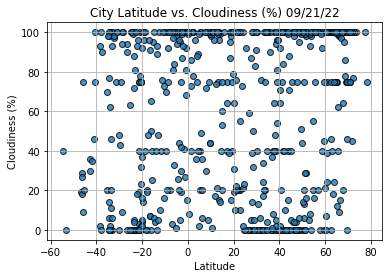

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

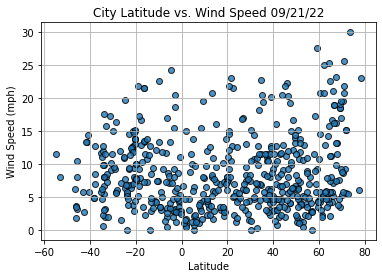

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2022-09-21 19:11:57
Lat                      -33.9258
Lng                       18.4232
Max Temp                     62.1
Humidity                       59
Cloudiness                      0
Wind Speed                   8.05
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Albany,US,2022-09-21 19:11:36,42.6001,-73.9662,78.24,67,10,1.99
2,Zaysan,KZ,2022-09-21 19:12:44,47.4667,84.8667,60.62,24,0,4.00
4,Guerrero Negro,MX,2022-09-21 19:12:44,27.9769,-114.0611,80.56,56,14,9.57
6,Cabo San Lucas,MX,2022-09-21 19:11:20,22.8909,-109.9124,88.52,74,20,6.91
9,Severo-Kurilsk,RU,2022-09-21 19:12:46,50.6789,156.1250,47.82,75,6,15.17


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Correlation between Latitude & Max Temp

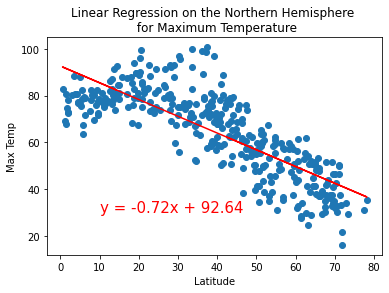

<Figure size 432x288 with 0 Axes>

In [26]:
# Linear regression on the Northern Hemisphere - Latitude vs Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,30))
# Save the figure.
plt.savefig("Lat_v_MaxTemp_Northern.png")

In [27]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

LinregressResult(slope=-0.7154943178509706, intercept=92.63843166342113, rvalue=-0.8004744473415192, pvalue=1.0474687309018301e-82, stderr=0.028118888259712455, intercept_stderr=1.2510573742572477)

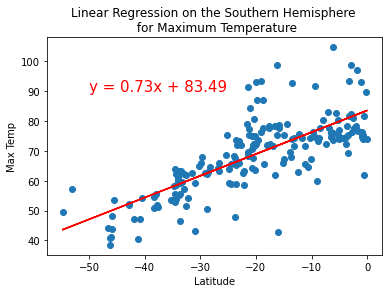

<Figure size 432x288 with 0 Axes>

In [28]:
# Linear regression on the Southern Hemisphere - Latitude vs Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))
# Save the figure.
plt.savefig("Lat_v_MaxTemp_Southern.png")

In [29]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

LinregressResult(slope=0.7277934071967911, intercept=83.49020780561005, rvalue=0.7557727673521474, pvalue=1.3547191201860513e-36, stderr=0.045868778475762456, intercept_stderr=1.1092774639279481)

# Correlation between Latitude and % Humidity

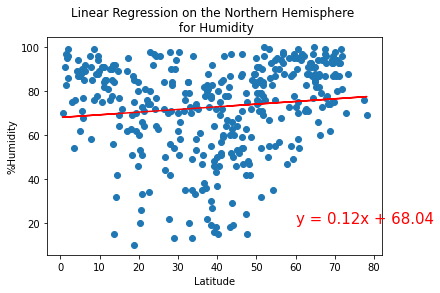

<Figure size 432x288 with 0 Axes>

In [30]:
# Linear regression on the Northern Hemisphere - Latitude vs Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Humidity', '%Humidity',(60, 20))
# Save the figure.
plt.savefig("Lat_v_Humidity_Northern.png")

In [31]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

LinregressResult(slope=0.12120650914948489, intercept=68.03617591105419, rvalue=0.1171608589244391, pvalue=0.025195534266015368, stderr=0.0539248231343086, intercept_stderr=2.399207501185343)

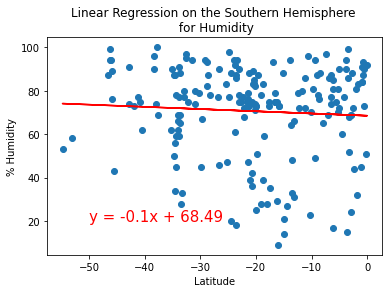

<Figure size 432x288 with 0 Axes>

In [32]:
# Linear regression on the Southern Hemisphere - Latitude vs Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Humidity', '% Humidity',(-50, 20))
# Save the figure.
plt.savefig("Lat_v_Humidity_Southern.png")

In [33]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

LinregressResult(slope=-0.10192209853295003, intercept=68.4852042238957, rvalue=-0.06194269143738462, pvalue=0.3946230627806615, stderr=0.11945727651411202, intercept_stderr=2.8889207243514052)

# Correlation between Latitude & %Cloudiness

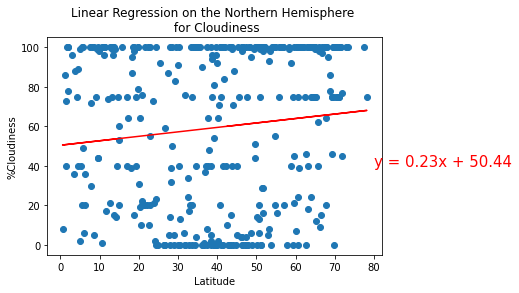

<Figure size 432x288 with 0 Axes>

In [34]:
# Linear regression on the Northern Hemisphere - Latitude vs Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', '%Cloudiness',(80,40))
# Save the figure.
plt.savefig("Lat_v_Cloudiness_Northern.png")

In [35]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

LinregressResult(slope=0.2250856324071861, intercept=50.43909514150676, rvalue=0.11376047214058915, pvalue=0.0297807193891009, stderr=0.10317501347196294, intercept_stderr=4.590432603558063)

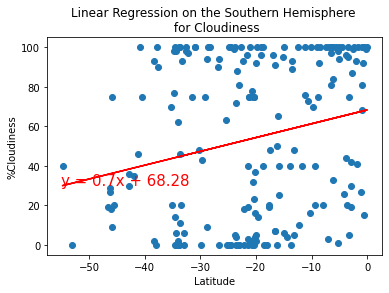

<Figure size 432x288 with 0 Axes>

In [36]:
# Linear regression on the Southern Hemisphere - Latitude vs Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness', '%Cloudiness',(-55, 30))
# Save the figure.
plt.savefig("Lat_v_Cloudiness_Southern.png")

In [37]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

LinregressResult(slope=0.698620846023812, intercept=68.284341313994, rvalue=0.2265445628772601, pvalue=0.001624723892546932, stderr=0.2184823251121798, intercept_stderr=5.2837142729140805)

# Correlation between Latitude & Wind Speed

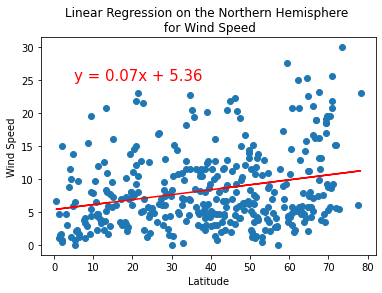

<Figure size 432x288 with 0 Axes>

In [38]:
# Linear regression on the Northern Hemisphere - Latitude vs Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5, 25))
plt.title 

# Save the figure.
plt.savefig("Lat_v_WindSpeed_Northern.png")

In [39]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

LinregressResult(slope=0.07495650015686571, intercept=5.355396189664493, rvalue=0.2580754204598032, pvalue=5.776666580055016e-07, stderr=0.014727958870501422, intercept_stderr=0.6552720499657004)

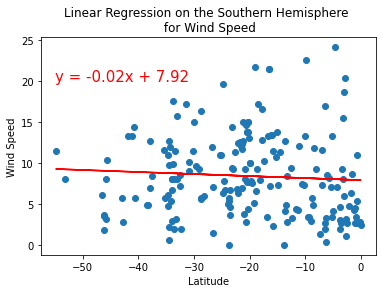

<Figure size 432x288 with 0 Axes>

In [40]:
# Linear regression on the Southern Hemisphere - Latitude vs Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55, 20))
# Save the figure.
plt.savefig("Lat_v_WindSpeed_Southern.png")

In [41]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

LinregressResult(slope=-0.024775165868308833, intercept=7.918665673419696, rvalue=-0.06417435404609033, pvalue=0.37777958236867837, stderr=0.028023864751038238, intercept_stderr=0.677721157037522)